## Classificadores 
#### Algoritmos
**1. Regressão Logística**  
**2. KNN (K-Nearest Neighbors)**  
><div>
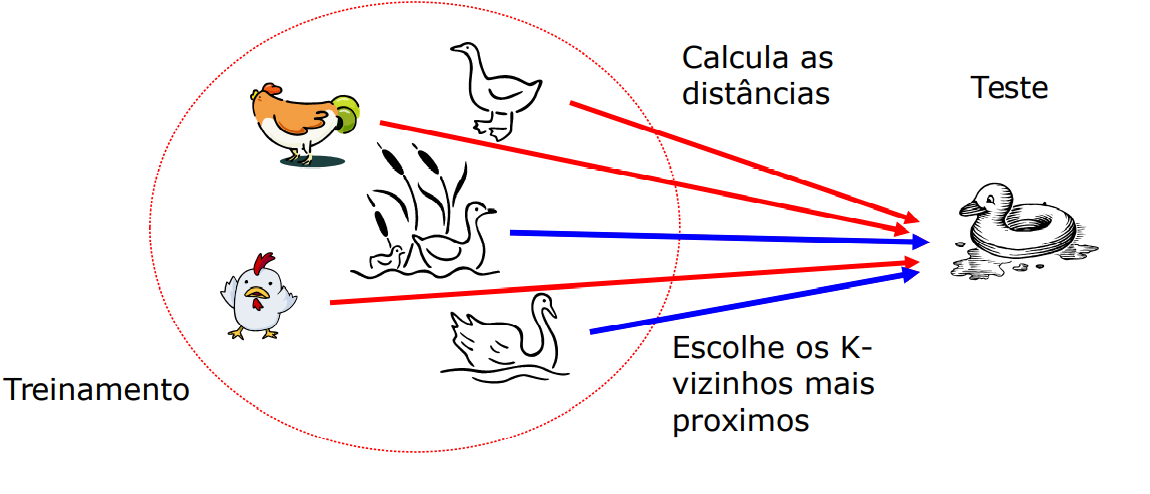
</div>

><div>
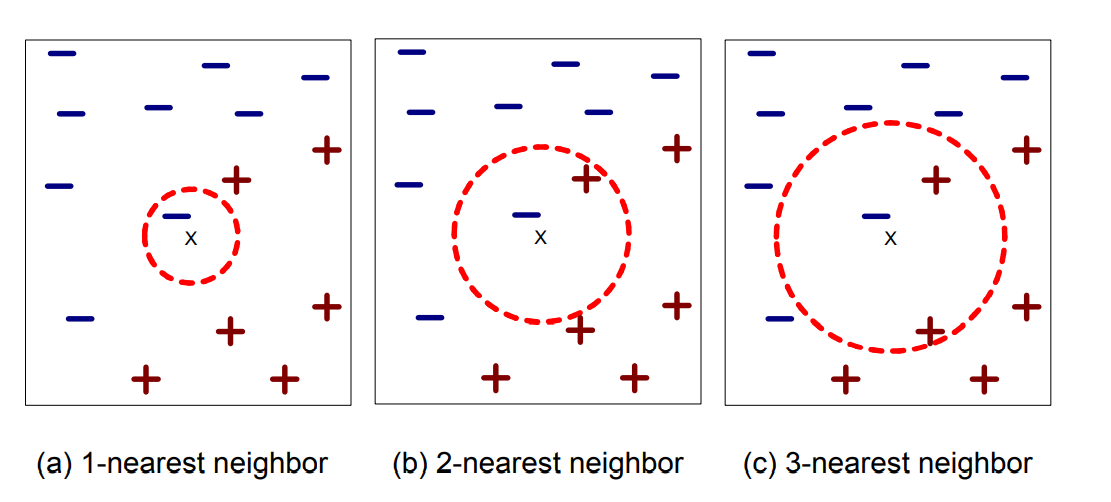
</div>

**3. Naive Bayes (Redes Bayesianas)**  
><div>
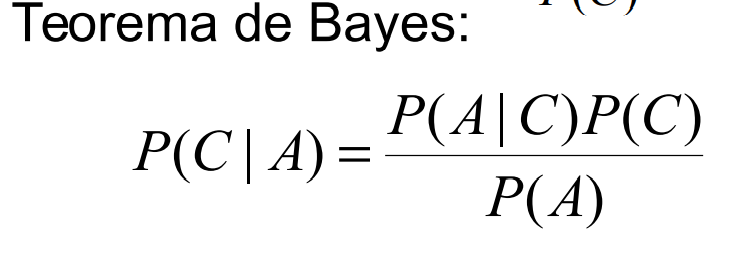
</div>

><div>
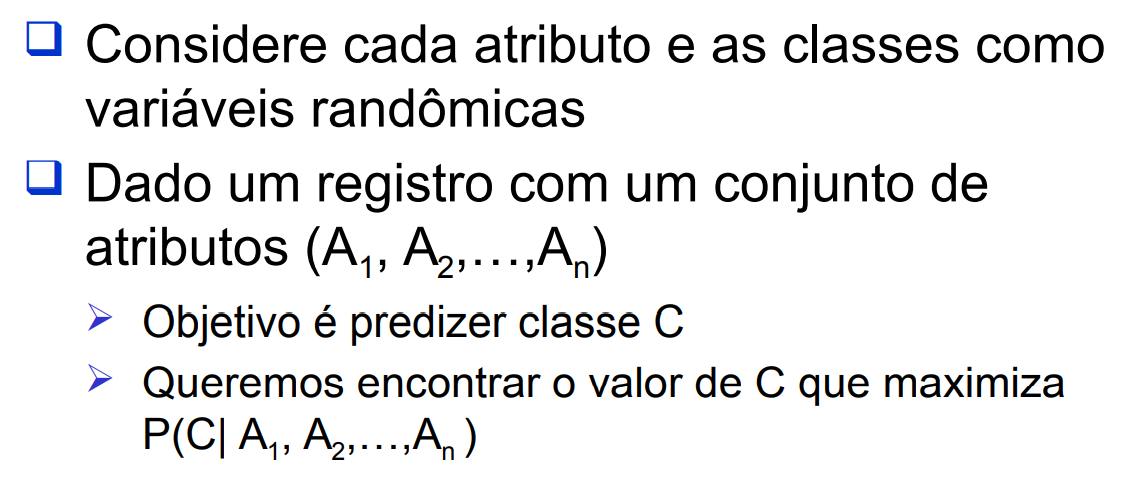
</div>

#### Avaliando a perfomance de um classificador

**Matriz de Confusão**
>**1. Estatística Kappa**   
>Medida de acordo entre as classificações e os verdadeiros rótulos dos dados.
><div>
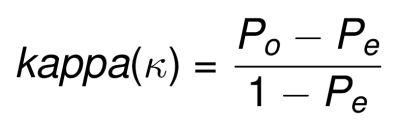
</div>

>Onde *Po* são os valores reais dos rótulos, e *Pe* os valores preditos pelo classificador.  
>O Kappa varia no intervalo de 0 a 1, cujos valores podem ser interpretados de acordo com a tabela abaixo.
><div>
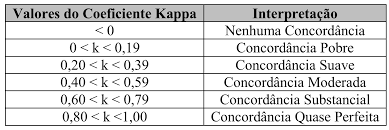
</div>

>**2.Erros**  
>Erros quadráticos, Raiz da soma dos erros quadráticos, etc.  
>**3. Acurácia**
>> Razão da quantidade de instâncias classificadas corretamente pelo modelo, sobre a quantidade total de instâncias.  
>> **3.1 Verdadeiros Positivos (TP) e Falsos Positivos (FP)**  
>>>**TP=** instâncias da classe Y que foram classificados como da classe Y;  
>>>**FP=** instâncias que foram classificados como da classe Y, mas pertencem a uma classe diferente.  
>> <div>
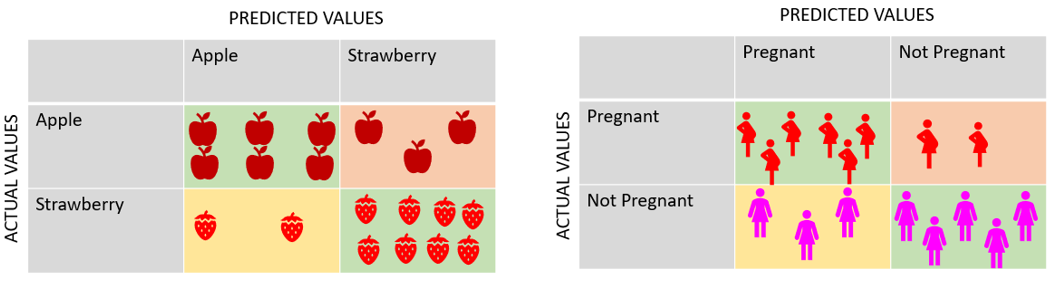
</div>  

>>**3.2 Recall**  
>>> Taxa de instâncias da classe Y que foram classificados corretamente (Recall = TP)    

>>**3.3 Precisão**  
>>>Razão da quantidade de instâncias de valores positivos classificadas corretamente pelo modelo, sobre a quantidade total de instâncias de valores positivos.  

>> **4.3 F1-score**
>>> Média ponderada da precisão e do recall:  
>>> **F1 =** 2*(precisão * recall)/precisão + recall

## Hands On

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris(as_frame=True)
df = iris.data
df['label'] = iris.target

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
len(df)

150

In [17]:
df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [12]:
df.corr('pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


**Dividindo os conjuntos do dataset**

In [7]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

**Instanciando e treinando o modelo**

In [28]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
naive = MultinomialNB()
model_reg = log_reg.fit(x_train,y_train)
model_knn = knn.fit(x_train,y_train)
model_naive = naive.fit(x_train,y_train)

In [29]:
pred_log_reg = model_reg.predict(x_test)
pred_knn = model_knn.predict(x_test)
pred_naive = model_naive.predict(x_test)

In [30]:
print("Regressão Logística:", model_reg.score(x_test, y_test))
print("KNN:", model_knn.score(x_test, y_test))
print("Naive Bayes:", model_naive.score(x_test, y_test))

Regressão Logística: 0.9666666666666667
KNN: 0.9666666666666667
Naive Bayes: 0.6333333333333333


In [15]:
print("Kappa:", metrics.cohen_kappa_score(y_test, pred_log_reg))
print("Todas:", metrics.precision_recall_fscore_support(y_test, pred_log_reg))

Kappa: 0.944954128440367
Todas: (array([1. , 1. , 0.8]), array([1.        , 0.90909091, 1.        ]), array([1.        , 0.95238095, 0.88888889]), array([15, 11,  4], dtype=int64))


In [33]:
matrix = metrics.confusion_matrix(y_test, pred_log_reg)
matrix_bayes = metrics.confusion_matrix(y_test, pred_naive)
matrix_knn = metrics.confusion_matrix(y_test, pred_log_knn)

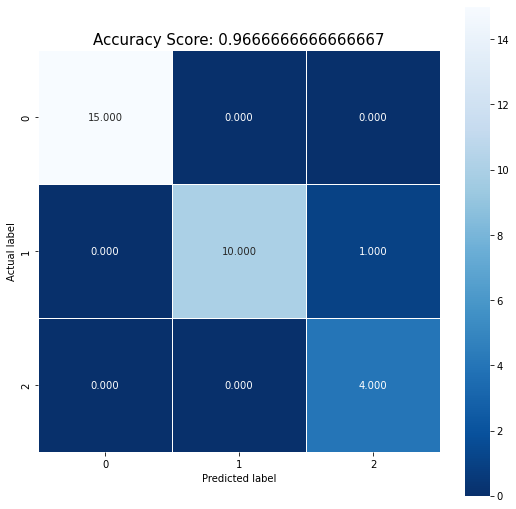

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_reg.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

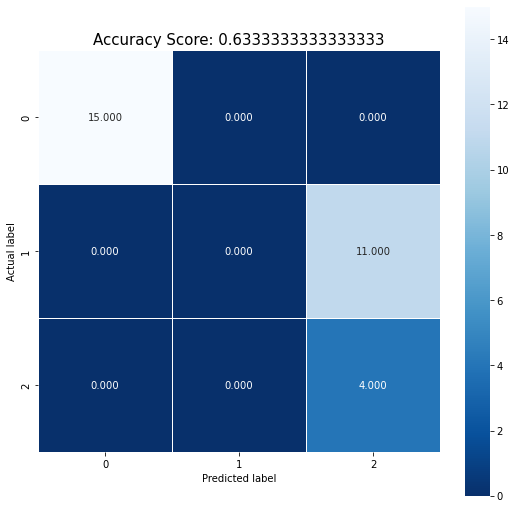

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(matrix_bayes, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_naive.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

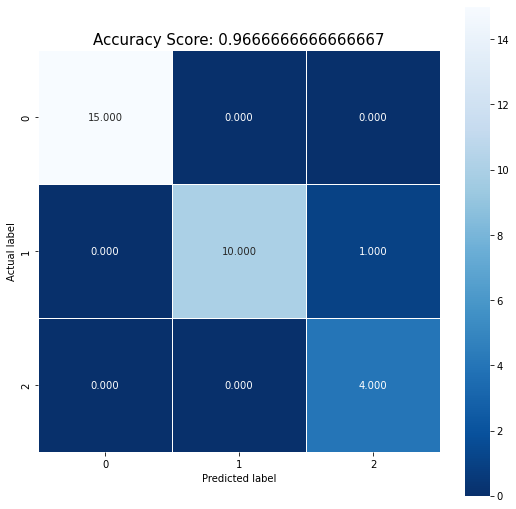

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(matrix_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_knn.score(x_test, y_test))
plt.title(all_sample_title, size = 15);